In [1]:
import os
import xarray as xr
import cfgrib
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# NARR
### Filter to Surface Level

In [16]:
ds = xr.open_dataset('../data/narr-a_221_19790108_0000_000.grb',engine='cfgrib',filter_by_keys={'stepType':'instant','typeOfLevel': 'surface'},backend_kwargs={'errors': 'ignore'})

Ignoring index file '../data/narr-a_221_19790108_0000_000.grb.5b7b6.idx' incompatible with GRIB file


In [12]:
print(ds)

<xarray.Dataset> Size: 24MB
Dimensions:        (isobaricInhPa: 29, y: 277, x: 349)
Coordinates:
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
  * isobaricInhPa  (isobaricInhPa) float64 232B 1e+03 975.0 ... 125.0 100.0
    latitude       (y, x) float64 773kB ...
    longitude      (y, x) float64 773kB ...
    valid_time     datetime64[ns] 8B ...
Dimensions without coordinates: y, x
Data variables:
    tpag10         (isobaricInhPa, y, x) float32 11MB ...
    unknown        (isobaricInhPa, y, x) float32 11MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          15
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-09-25T10:31 GRIB to CDM+CF via cfgrib-0.9.1...


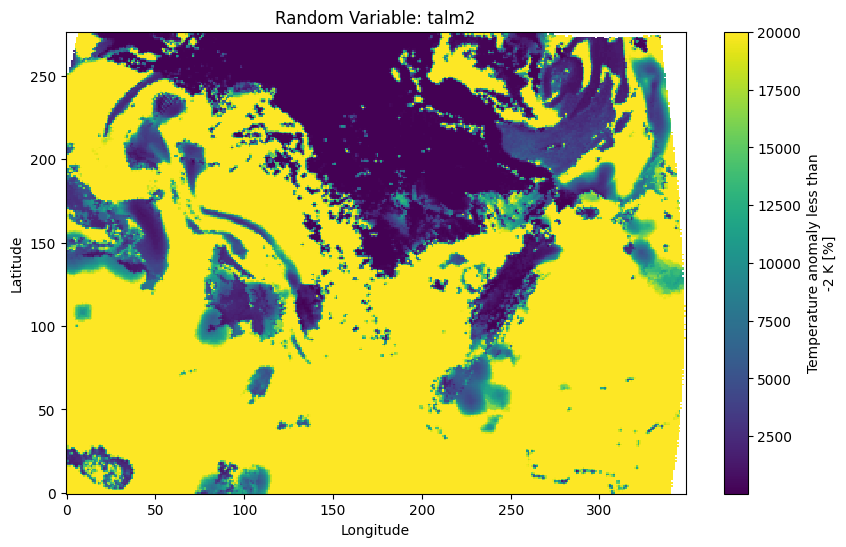

In [7]:
data = ds['talm2']

plt.figure(figsize=(10, 6))
data.plot(cmap='viridis')
plt.title('Random Variable: talm2')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### Filter by Isobaric Pressure 

In [14]:
ds = xr.open_dataset('../data/narr-a_221_19790108_0000_000.grb',engine='cfgrib',backend_kwargs={'errors': 'ignore','filter_by_keys': {'typeOfLevel': 'isobaricInhPa'}})

Ignoring index file '../data/narr-a_221_19790108_0000_000.grb.5b7b6.idx' incompatible with GRIB file


In [ ]:
print(ds)

# GWIS: GlobFire

In [ ]:
#Combining all the years into one .shp; this will take about 5 minutes to run

western_us_bounds = {
    "min_longitude": -125,
    "max_longitude": -100,
    "min_latitude": 32,
    "max_latitude": 49
}

main = gpd.read_file('../data/globfire/original_globfire_filtered_2002.shp').to_crs(epsg=4326).cx[
    western_us_bounds["min_longitude"]:western_us_bounds["max_longitude"],
    western_us_bounds["min_latitude"]:western_us_bounds["max_latitude"]]

for year in np.arange(2003,2024):
    print(year)
    temp = gpd.read_file(f"../data/globfire/original_globfire_filtered_{year}.shp")
    temp = temp.to_crs(epsg=4326).cx[
        western_us_bounds["min_longitude"]:western_us_bounds["max_longitude"],
        western_us_bounds["min_latitude"]:western_us_bounds["max_latitude"]]
    main = pd.concat([main,temp])

main.to_file("../data/full_globfire.shp")

(32.0, 49.0)

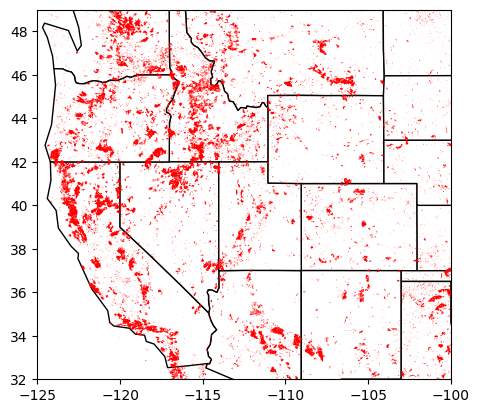

In [13]:
states = gpd.read_file('../data/state_borders/ne_110m_admin_1_states_provinces.shp')

ax = states.plot(color='white', edgecolor='black')

main.plot(ax=ax,color="red",markersize = main["area_ha"]/np.max(main["area_ha"]))
ax.set_xlim([-125,-100])
ax.set_ylim([32,49])